In [1]:
import os
import sys
sys.path.insert(0, '../') # Hack to import from parent directory, to be removed
from tropical_cyclones import TCs
from aqua.util import load_yaml
from plotting_hist import plot_hist_cat, plot_press_wind

Get variables and other parameters from configuration file and store them in a dictionary

In [2]:
# load the config file
tdict = load_yaml('../config/config_tcs.yaml')
tdict

{'dataset': {'model': 'IFS', 'exp': 'tco2559-ng5-cycle3', 'source2d': '2D_1h_native', 'source3d': '3D_1h6h_native'}, 'paths': {'tmpdir': '/scratch/b/b382216/tmpdir', 'fulldir': '/home/b/b382216/scratch/fullres/NetCDF', 'plotdir': '/home/b/b382216/scratch/fullres/PDF/'}, 'grids': {'lowgrid': 'r100', 'highgrid': 'r010'}, 'varlist': ['msl', '10u', '10v', 'tprate'], 'time': {'startdate': '2020-01-20', 'enddate': '2024-12-31', 'frequency': '6h'}, 'stream': {'streamstep': 10}, 'detect': {'boxdim': 10}, 'stitch': {'n_days_freq': 30, 'n_days_ext': 2}}

Finally plot all TCs tracks found in the simulation

Getting trajectories from TempestExtremes file...
Running getTrajectories on '/home/b/b382216/scratch/tmpdir/IFS/tco1279-orca025-cycle3/tempest_tracks_tot.txt' with unstruc set to '0'
nVars set to 10 and headerDelimStr set to 'start'
Found 10 columns
Found 295 trajectories
... done reading data
Getting trajectories from TempestExtremes file...
Running getTrajectories on '/home/b/b382216/scratch/tmpdir/IFS/tco2559-ng5-cycle3/tempest_tracks_tot.txt' with unstruc set to '0'
nVars set to 10 and headerDelimStr set to 'start'
Found 10 columns
Found 374 trajectories
... done reading data
Getting trajectories from TempestExtremes file...
Running getTrajectories on '/home/b/b382216/scratch/tmpdir/ERA5_TC_tracks_2000_2021.txt' with unstruc set to '0'
nVars set to 10 and headerDelimStr set to 'start'
Found 10 columns
Found 1712 trajectories
... done reading data


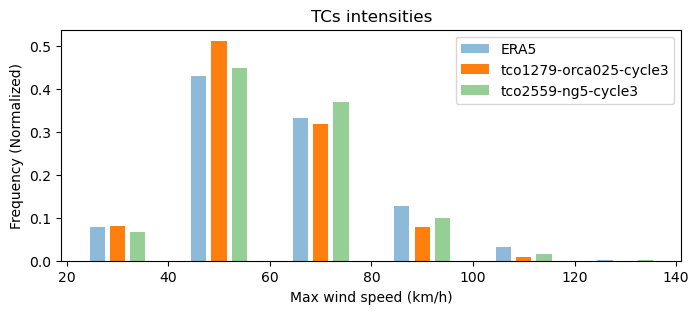

In [3]:
from glob import glob

tmpdir_tco1279 = "/home/b/b382216/scratch/tmpdir/IFS/tco1279-orca025-cycle3"
tmpdir_tco2559 = "/home/b/b382216/scratch/tmpdir/IFS/tco2559-ng5-cycle3"
tmpdir_ERA5 = "/home/b/b382216/scratch/tmpdir"

def merge_files(input_files, output_file):
    with open(output_file, 'w') as output:
        for file in input_files:
            with open(file) as input_file:
                output.writelines(input_file.readlines())

filenames_tco1279 = sorted(glob(os.path.join(tmpdir_tco1279, "tempest_track*.txt")))
filenames_tco2559 = sorted(glob(os.path.join(tmpdir_tco2559, "tempest_track*.txt")))

tracks_file_tco1279 = os.path.join(tmpdir_tco1279, "tempest_tracks_tot.txt")
tracks_file_tco2559 = os.path.join(tmpdir_tco2559, "tempest_tracks_tot.txt")
tracks_file_ERA5 = os.path.join(tmpdir_ERA5, "ERA5_TC_tracks_2000_2021.txt")
tracks_file_ibtracs = os.path.join(tmpdir_ERA5, "ibtracs.since1980.list.v04r00.csv")

merge_files(filenames_tco1279, tracks_file_tco1279)
merge_files(filenames_tco2559, tracks_file_tco2559)

plot_hist_cat(tracks_file_tco1279, tracks_file_tco2559, tracks_file_ERA5)

Getting trajectories from TempestExtremes file...
Running getTrajectories on '/home/b/b382216/scratch/tmpdir/IFS/tco1279-orca025-cycle3/tempest_tracks_tot.txt' with unstruc set to '0'
nVars set to 10 and headerDelimStr set to 'start'
Found 10 columns
Found 295 trajectories
... done reading data
Getting trajectories from TempestExtremes file...
Running getTrajectories on '/home/b/b382216/scratch/tmpdir/IFS/tco2559-ng5-cycle3/tempest_tracks_tot.txt' with unstruc set to '0'
nVars set to 10 and headerDelimStr set to 'start'
Found 10 columns
Found 374 trajectories
... done reading data
Getting trajectories from TempestExtremes file...
Running getTrajectories on '/home/b/b382216/scratch/tmpdir/ERA5_TC_tracks_2000_2021.txt' with unstruc set to '0'
nVars set to 10 and headerDelimStr set to 'start'
Found 10 columns
Found 1712 trajectories
... done reading data


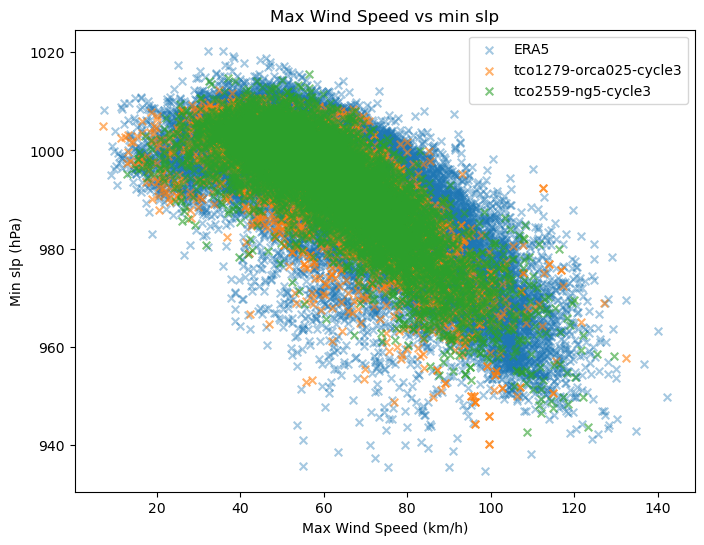

In [4]:
plot_press_wind(tracks_file_tco1279, tracks_file_tco2559,tracks_file_ERA5)